In [1]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
data=pd.read_csv(r"C:\Users\Theenesh\Downloads\Iris DataSet.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
data['Species'] = (data['Species'] == 'Iris-virginica').astype(int)

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1
149,150,5.9,3.0,5.1,1.8,1


In [10]:
print(data['Species'].unique())

[0 1]


In [11]:
print(data['Species'].value_counts())

Species
0    100
1     50
Name: count, dtype: int64


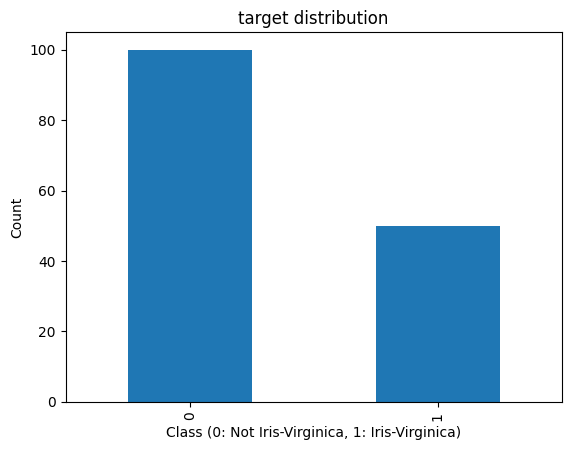

In [12]:
data['Species'].value_counts().plot(kind='bar',title='target distribution')
plt.xlabel('Class (0: Not Iris-Virginica, 1: Iris-Virginica)')
plt.ylabel('Count')
plt.show()

In [13]:
x = data.iloc[:, 1:-1].values 
y = data.iloc[: ,-1].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic(x,y,iteration,learningrate):
    b=0
    m,n=x.shape
    cost_history=[]
    w=np.zeros((n,1))
    for _ in range(iterations):
        ypred=sigmoid(np.dot(x,w)+b)

        cost=(-1/m)*np.sum(y*np.log(ypred)+(1-y)*np.log(1-ypred))

        dw=(1/m)*np.dot(x.T,(ypred-y))
        db=(1/m)*np.sum((ypred-y))

        w-=learningrate*dw
        b-=learningrate*db
        cost_history.append(cost)
        
    return w,b,cost_history
        
iterations=100000
learningrate=0.00001



In [17]:
w,b,cost_history=logistic(x_train,y_train,iterations,learningrate)

In [18]:
print("parameters are:")
print(f"w: {w}")
print(f"optimal cost: {cost_history[-1]}")

parameters are:
w: [[-0.16757111]
 [-0.21064175]
 [ 0.25423981]
 [ 0.152138  ]]
optimal cost: 0.5060375522063965


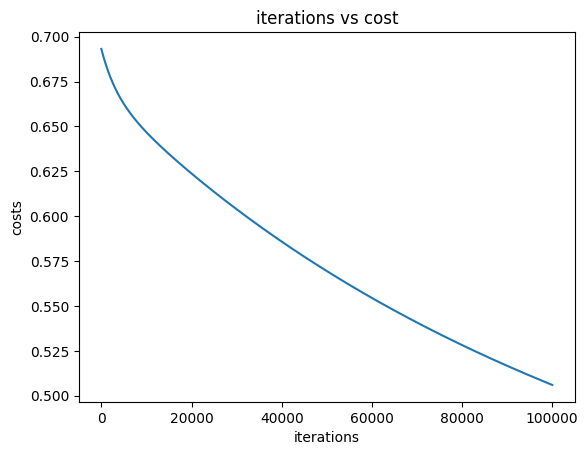

In [19]:
plt.plot(range(iterations),cost_history)
plt.xlabel('iterations')
plt.ylabel('costs')
plt.title('iterations vs cost')
plt.show()

In [20]:
def predict(x,w,b):
    ypred=sigmoid(np.dot(x,w)+b)
    return (ypred>0.5).astype(int)

In [21]:
ypredtest=predict(x_test,w,b)


In [53]:
accuracy = accuracy_score(y_test, ypredtest)
precision = precision_score(y_test, ypredtest)
recall = recall_score(y_test, ypredtest)
f1 = f1_score(y_test, ypredtest)
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Evaluation Metrics:
Accuracy: 0.80
Precision: 1.00
Recall: 0.45
F1 Score: 0.62


In [26]:
def evaluationmetrics(ypred,ytest):
    tn=np.sum((ypred==0) & (ytest==0))
    fp=np.sum((ypred==1) & (ytest==0))
    fn=np.sum((ypred==0) & (ytest==1))
    tp=np.sum((ypred==1) & (ytest==1))
    accu=(tp+tn)/len(ytest)
    prec=(tp)/(tp+fp) if(tp+fp)!=0 else 0
    recal=(tp)/(tp+fn) if(tp+fn)!=0 else 0
    f1=(2*prec*recal)/(prec+recal) if (prec + recal) != 0 else 0
    return accu,prec,recal,f1

accuracy, precision, recall, f1score= evaluationmetrics(ypredtest, y_test)
print(f'accuracy : {accuracy : .4f}')
print(f'precision : {precision : .4f}')
print(f'recall : {recall : .2f}')
print(f'f1score : {f1score : .2f}')

accuracy :  0.8000
precision :  1.0000
recall :  0.45
f1score :  0.62
